In [1]:
import pandas as pd

csv = 'driving_log.csv'
data = pd.read_csv(csv)

## Loss

In [2]:
import numpy as np

history_pilot = np.load('train-pilot/history_object.npy').item()
history_ours = np.load('train-ours/history_object.npy').item()

In [3]:
# 平滑曲线
def smooth(points, smoothing=0.8):
    last = points[0]
    smoothed = []
    for point in points:
        smoothed_val = last * smoothing + (1 - smoothing) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed

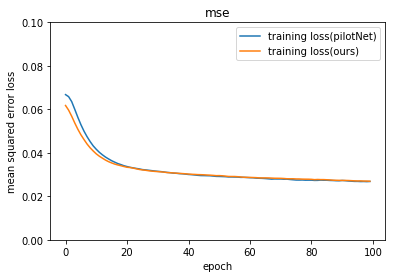

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(smooth(history_pilot['loss']))
plt.plot(smooth(history_ours['loss']))
plt.title('mse')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training loss(pilotNet)', 'training loss(ours)'],
           loc='upper right')
plt.ylim([0, 0.1])
plt.show()

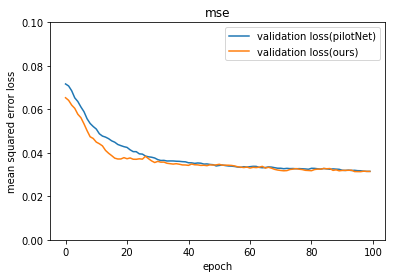

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(smooth(history_pilot['val_loss']))
plt.plot(smooth(history_ours['val_loss']))
plt.title('mse')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['validation loss(pilotNet)',
            'validation loss(ours)'], loc='upper right')
plt.ylim([0, 0.1])
plt.show()

## 评估

1. 实际与预测偏差不超过0.05
2. 实际与预测偏差不超过0.10
3. 实际与预测偏差不超过0.15
4. 实际与预测偏差不超过0.20
5. 实际与预测偏差不超过0.25

In [6]:
from keras.models import load_model

model_pilot = load_model('train-pilot/model/model.h5')
model_ours = load_model('train-ours/model/model.h5')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [7]:
import numpy as np
import cv2

X_test = []
y_test = []

for index in range(len(data)):
    image = data['center'][index].strip()
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    steer = data['steering'][index]

    X_test.append(image)
    y_test.append(steer)

In [8]:
len(X_test)

8036

In [9]:
num1 = []
num2 = []
num3 = []
num4 = []
num5 = []
y_preds = []

## train-pilotNet

In [10]:
n1 = 0
n2 = 0
n3 = 0
n4 = 0
n5 = 0
y_pred = []

for X, y in zip(X_test, y_test):
    pred = model_pilot.predict(np.expand_dims(X, axis=0))[0][0]
    y_pred.append(pred)
    if np.abs(y - pred) <= 0.05:
        n1 += 1
    if np.abs(y - pred) <= 0.10:
        n2 += 1
    if np.abs(y - pred) <= 0.15:
        n3 += 1
    if np.abs(y - pred) <= 0.20:
        n4 += 1
    if np.abs(y - pred) <= 0.25:
        n5 += 1

num1.append(n1 / len(X_test))
num2.append(n2 / len(X_test))
num3.append(n3 / len(X_test))
num4.append(n4 / len(X_test))
num5.append(n5 / len(X_test))
y_preds.append(y_pred)

In [11]:
print('0.05: %f' % num1[-1])
print('0.10: %f' % num2[-1])
print('0.15: %f' % num3[-1])
print('0.20: %f' % num4[-1])
print('0.25: %f' % num5[-1])

0.05: 0.386635
0.10: 0.755724
0.15: 0.892484
0.20: 0.947735
0.25: 0.976979


## train-ours

In [12]:
n1 = 0
n2 = 0
n3 = 0
n4 = 0
n5 = 0
y_pred = []

for X, y in zip(X_test, y_test):
    pred = model_ours.predict(np.expand_dims(X, axis=0))[0][0]
    y_pred.append(pred)
    if np.abs(y - pred) <= 0.05:
        n1 += 1
    if np.abs(y - pred) <= 0.10:
        n2 += 1
    if np.abs(y - pred) <= 0.15:
        n3 += 1
    if np.abs(y - pred) <= 0.20:
        n4 += 1
    if np.abs(y - pred) <= 0.25:
        n5 += 1

num1.append(n1 / len(X_test))
num2.append(n2 / len(X_test))
num3.append(n3 / len(X_test))
num4.append(n4 / len(X_test))
num5.append(n5 / len(X_test))
y_preds.append(y_pred)

In [13]:
print('0.05: %f' % num1[-1])
print('0.10: %f' % num2[-1])
print('0.15: %f' % num3[-1])
print('0.20: %f' % num4[-1])
print('0.25: %f' % num5[-1])

0.05: 0.428696
0.10: 0.773892
0.15: 0.882155
0.20: 0.942633
0.25: 0.972623


## Evaluate

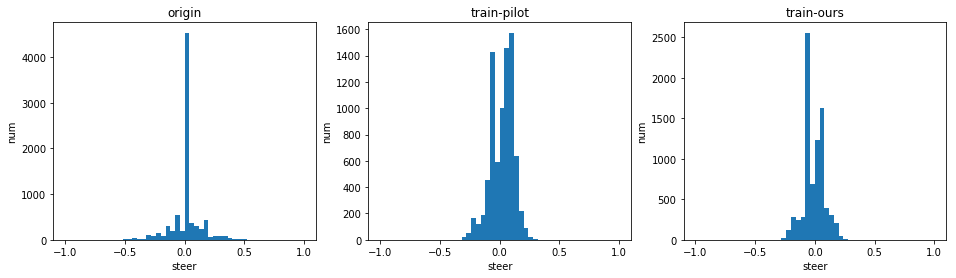

In [14]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.title('origin')
plt.xlabel('steer')
plt.ylabel('num')
plt.hist(np.array(y_test), bins=50, range=(-1, 1))

plt.subplot(1, 3, 2)
plt.title('train-pilot')
plt.xlabel('steer')
plt.ylabel('num')
plt.hist(np.array(y_preds[0]), bins=50, range=(-1, 1))

plt.subplot(1, 3, 3)
plt.title('train-ours')
plt.xlabel('steer')
plt.ylabel('num')
plt.hist(np.array(y_preds[1]), bins=50, range=(-1, 1))

plt.show()

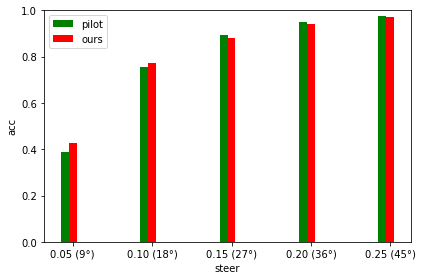

In [15]:
name_list = ['0.05 (9°)', '0.10 (18°)', '0.15 (27°)',
             '0.20 (36°)', '0.25 (45°)']
list0 = [num1[0], num2[0], num3[0], num4[0], num5[0]]
list1 = [num1[1], num2[1], num3[1], num4[1], num5[1]]

# 设置柱状图
bar_width = 0.1
index = np.arange(len(name_list))
bar0 = plt.bar(index + bar_width * 0, list0,
               bar_width, color='g', label='pilot')
bar1 = plt.bar(index + bar_width * 1, list1,
               bar_width, color='r', label='ours')
plt.xlabel('steer')
plt.ylabel('acc')
plt.xticks(index + bar_width, name_list)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()